In [1]:
#NEW DOCUMNET USE THIS NOT THE OTHER ONE 

In [33]:
#importing
from astropy.table import Table, join, unique, QTable
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 

In [34]:
#reading files using Table.read function in astropy.table
data_summary_6866 = Table.read("/users/EllaMathews/Research/summary_ngc6866.csv")
data_gaia_6866 = Table.read("/users/EllaMathews/Research/summary_ngc6866_xmatch_gaiadr3.csv")
data_kic_6866_all = Table.read("/users/EllaMathews/Research/summary_ngc6866_xmatch_kic.csv")
data_kic_6866 = data_kic_6866_all['id', 'KIC'] #only need kic and ids not the other columns

In [35]:
len(data_kic_6866)

5568

In [36]:
check = unique(data_kic_6866, keys = 'id')
print(len(check))

2874


In [37]:
values, counts = np.unique(check['KIC'], return_counts = True)

In [38]:
len(np.where(counts > 1)[0])

0

In [39]:
#isolating the columns from gaia that is needed in the output table
data_gaia_6866.sort(keys = 'angDist')
data_gaia_6866_columnsneeded = unique(data_gaia_6866['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'],keys='id')
data_gaia_6866_columnsneeded.sort(keys = ['id', 'angDist'])
data_gaia_6866_columnsneeded2 = unique(data_gaia_6866_columnsneeded['angDist','id', 'RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name'], keys = 'DR3Name')

In [90]:
#using join function to merge data files 
combined_table = join(data_summary_6866, data_gaia_6866_columnsneeded2, keys='id', join_type ='right')
combined_table_wantedcolumns= combined_table['angDist', 'date', 'fwhm', 'id', 'hjd', 'ra', 'dec','v', 'bv', 'teff', 'feh', 'feh_err', 'logg', 'logg_err', 'rv', 'rve','vsini', 'vsini_err','RAdeg', 'e_RAdeg', 'DEdeg', 'e_DEdeg', 'DR3Name']

In [41]:
#using join function to merge KIC data

In [42]:
combined_table_all = join(combined_table_wantedcolumns, unique(data_kic_6866, keys = 'id'), 
                          keys =['id'], join_type='left')

In [43]:
len(data_kic_6866),len(data_summary_6866),len(combined_table),len(combined_table_wantedcolumns),len(combined_table_all)

(5568, 4586, 4586, 4586, 4586)

In [44]:
x = unique(combined_table_all)
print(len(x))

4586


In [45]:
combined_table_all.write('Combined_Data_6866.csv', format = 'csv', overwrite = True)

In [46]:
#checking to see if sort actually sorted 
#print(combined_table_wanted)

In [47]:
#using unique function to get the first instance of each id 
unique_ids = unique(data_gaia_6866, keys = 'id')
unique_ids.sort(keys = ['id', 'angDist'])
unique_ids2 = unique(unique_ids, keys = 'DR3Name')


In [48]:
#checking to see if it worked 
#print(unique_ids2)

In [49]:
#using numpy unique function to get the values of the unique ids and how many times they appear 
values, counts = np.unique(unique_ids2['id'], return_counts=True)

In [50]:
#seeing where the unique values appear more than once 
duplicates = counts > 1

In [51]:
#using the location of the duplicated unique values to find which ids are duplicated 
duplicated_ids=values[np.where(duplicates)]

In [52]:
# how many ids are duplicated 
len(duplicated_ids)

0

In [53]:
unique_ids2.write('Combined_Data_Unique_6866.csv', format = 'csv', overwrite = True)

In [54]:
#function that plots V vs B-V
def VvsBV(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['bv'], tbl['v'], '.')
    ax.set_xlabel('B-V')
    ax.set_ylabel('V')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.05)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

In [55]:
#function that plots G vs BP-RP
def GvsBPRP(tbl):
    fig, ax = plt.subplots()
    ax.plot(tbl['BP-RP'], tbl['Gmag'], '.')
    ax.set_xlabel('BP-RP')
    ax.set_ylabel('Gmag')
    ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
    XminorLocator = MultipleLocator(0.25)
    YminorLocator = MultipleLocator(0.5)
    ax.xaxis.set_minor_locator(XminorLocator)
    ax.yaxis.set_minor_locator(YminorLocator)
    ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
    ax.invert_yaxis() #flip y axis
    plt.show();

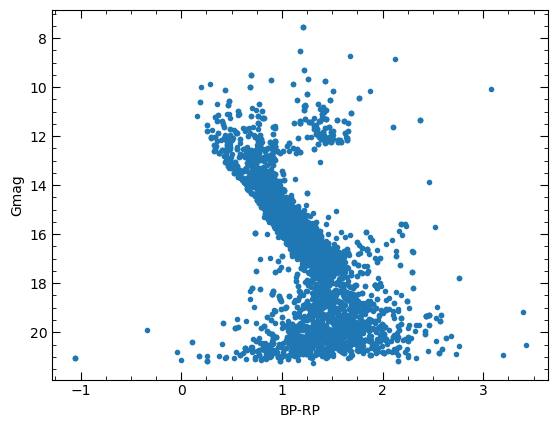

In [56]:
GvsBPRP(data_gaia_6866)

In [57]:
#data_gaia_6866.info

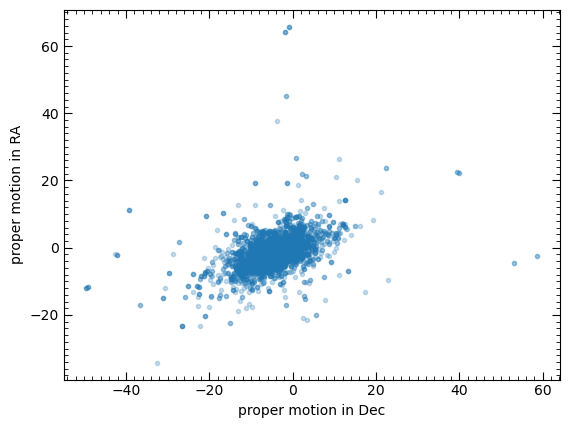

In [58]:
#plot proper motion in Ra vs proper motion in Dec 
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmDE'], data_gaia_6866['pmRA'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('proper motion in RA')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(2)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

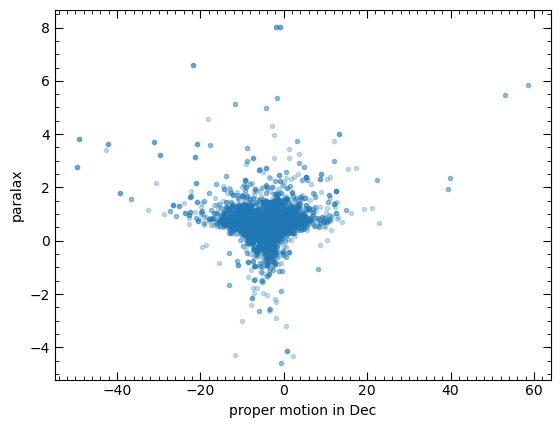

In [59]:
#plot paralax vs proper motion in Dec
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmDE'], data_gaia_6866['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Dec')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

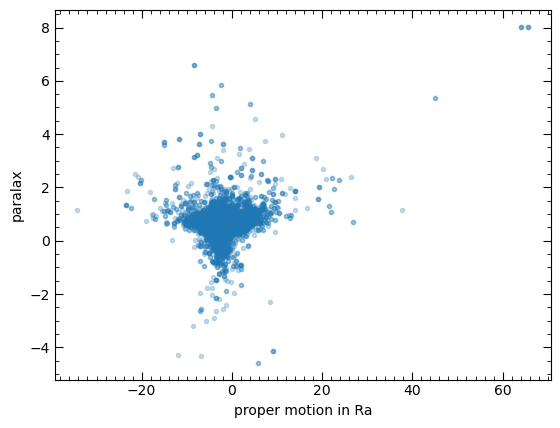

In [60]:
#plot paralax vs proper motion in RA
fig, ax = plt.subplots()
ax.plot(data_gaia_6866['pmRA'], data_gaia_6866['Plx'], '.', alpha = 0.25)
ax.set_xlabel('proper motion in Ra')
ax.set_ylabel('paralax')
ax.tick_params(axis='both', direction='in', length=6, top=True, right=True)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

In [61]:
#importing new data
new_6866 = QTable.read("/users/EllaMathews/Research/rcat_ngc6866_v0.fits")

Text(0, 0.5, 'G')

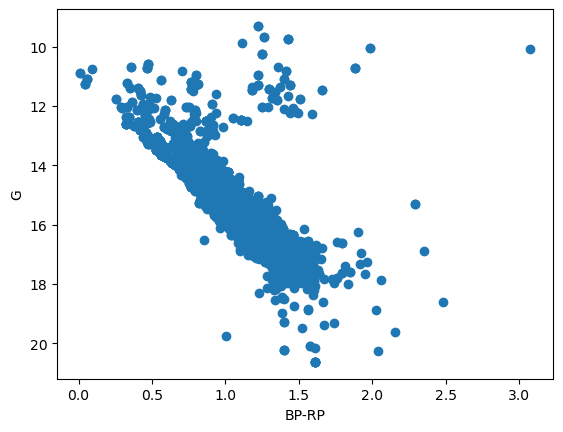

In [62]:
fig, ax = plt.subplots()
x1 = new_6866['GAIAEDR3_BP'] - new_6866['GAIAEDR3_RP']
y1 = new_6866['GAIAEDR3_G']
ax.invert_yaxis()
plt.scatter(x1,y1)
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')

In [63]:
membership = new_6866['MemBool']

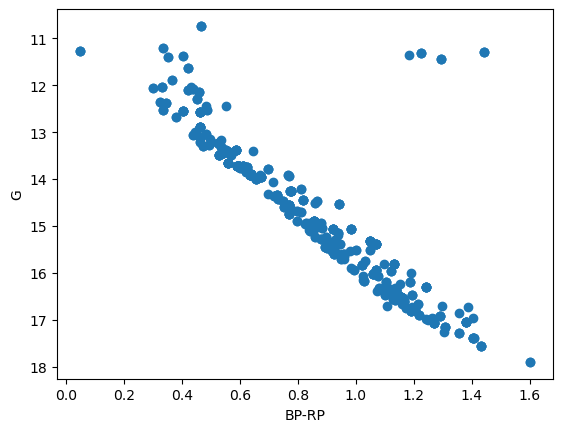

In [64]:
fig, ax = plt.subplots()
x2=x1[membership==1]
y2=y1[membership==1]
ax.invert_yaxis()
ax.set_xlabel('BP-RP')
ax.set_ylabel('G')
plt.scatter(x2,y2)

In [65]:
#new vs old plotting

In [66]:
new_Teff_all = new_6866['Teff']

In [67]:
new_Teff_incluster = new_Teff_all[membership ==1]

In [68]:
new_names_all = new_6866['GAIAEDR3_ID']

In [69]:
new_names_incluster = new_names_all[membership==1]

In [70]:
new_Teff_err_all = new_6866['Teff_err']
new_Teff_err_incluster = new_Teff_err_all[membership==1]

In [71]:
new_logg_all = new_6866['log(g)']
new_logg_incluster = new_logg_all[membership ==1]

In [72]:
new_logg_err_all = new_6866['log(g)_err']
new_logg_err_incluster = new_logg_err_all[membership ==1]

In [73]:
new_feh_all = new_6866['[Fe/H]']
new_feh_err_all = new_6866['[Fe/H]_err']
new_feh_incluster = new_feh_all[membership==1]
new_feh_err_incluster = new_feh_err_all[membership==1]

In [74]:
new_rv_all = new_6866['vrad']
new_rv_err_all = new_6866['vrad_err']
new_rv_incluster = new_rv_all[membership==1]
new_rv_err_incluster = new_rv_err_all[membership==1]

In [75]:
new_obs_date_all = new_6866['DATE-OBS']
new_obs_date_incluster = new_obs_date_all[membership==1]

In [76]:
new_specjitter_all = new_6866['specjitter']
new_specjitter_incluster = new_specjitter_all[membership==1]

In [77]:
new_lsf_all = new_6866['lsf']
new_lsf_incluster = new_lsf_all[membership==1]

In [78]:
new_SNR_all = new_6866['SNR']
new_SNR_incluster = new_SNR_all[membership==1]

In [79]:
new_catalog = Table()

In [80]:
new_catalog['DR3_ID']= new_names_incluster
new_catalog['Teff_new'] = new_Teff_incluster
new_catalog['Teff_err_new'] = new_Teff_err_incluster
new_catalog['logg_new'] = new_logg_incluster
new_catalog['logg_err_new'] = new_logg_err_incluster
new_catalog['[Fe/H]_new'] = new_feh_incluster
new_catalog['[Fe/H]_err_new'] = new_feh_err_incluster
new_catalog['RV_new'] = new_rv_incluster
new_catalog['RV_err_new'] = new_rv_err_incluster
new_catalog['specjitter'] = new_specjitter_incluster
new_catalog['lsf'] = new_lsf_incluster
new_catalog['SNR'] = new_SNR_incluster

In [81]:
old_data = Table()
old_names =[]

In [82]:
for name in combined_table_wantedcolumns['DR3Name']:
    num = np.int64(name[9:])
    old_names.append(num)

In [83]:
old_data['DR3_ID'] = old_names

In [84]:
old_data['Teff_old'] = combined_table_wantedcolumns['teff']

In [85]:
old_data['logg_old'] = combined_table_wantedcolumns['logg']
old_data['logg_err_old'] = combined_table_wantedcolumns['logg_err']

In [86]:
old_data['[Fe/H]_old'] = combined_table_wantedcolumns['feh']
old_data['[Fe/H]_err_old'] = combined_table_wantedcolumns['feh_err']

In [87]:
old_data['RV_old'] = combined_table_wantedcolumns['rv']
old_data['RV_err_old'] = combined_table_wantedcolumns['rve']

In [91]:
old_data['fwhm'] = combined_table_wantedcolumns['fwhm']
old_data['DATE'] = combined_table_wantedcolumns['date']

In [92]:
newdatesreformat = []
for date in new_obs_date_incluster:
    newformat = date[0:4] + date[5:7] + date[8:10]
    newdatesreformat.append(np.int64(newformat))

In [93]:
new_catalog['DATE'] = newdatesreformat

In [94]:
NewVsOld = join(new_catalog, old_data, keys = ['DR3_ID', 'DATE'])

Text(0, 0.5, 'New Teff')

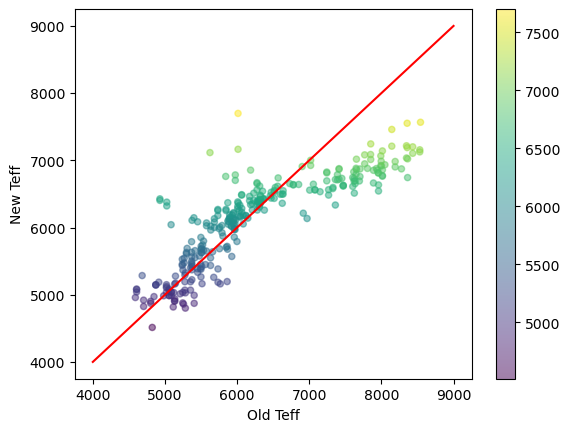

In [95]:
#new vs old Teff
fig, ax = plt.subplots()
x1 = np.linspace(4000, 9000)
ax.plot(x1, x1, 'r')
x = NewVsOld['Teff_old']
y = NewVsOld['Teff_new']
scatter = plt.scatter(x, y, alpha= 0.5, c = NewVsOld['Teff_new'], s=20)
#plt.errorbar(x, y, yerr = NewVsOld['Teff_err_new'], fmt='none', color = 'gray', zorder = -1)
plt.colorbar(scatter)
ax.set_xlabel('Old Teff')
ax.set_ylabel('New Teff')

Text(0, 0.5, 'New logg')

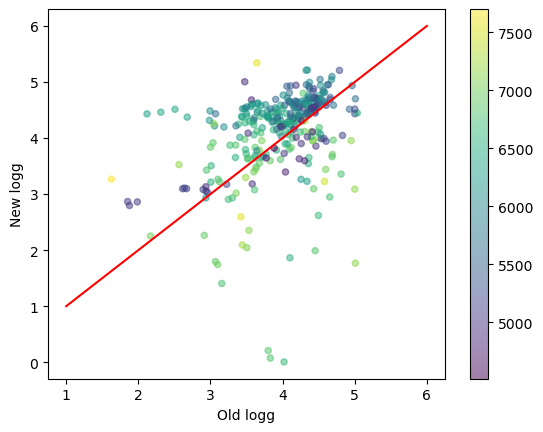

In [96]:
#new vs old logg
fig, ax = plt.subplots()
x1 = np.linspace(1, 6)
ax.plot(x1, x1,'r')
x = NewVsOld['logg_old']
y = NewVsOld['logg_new']
scatter = plt.scatter(x, y, c = NewVsOld['Teff_new'], s = 20, alpha = 0.5)
#plt.errorbar(x, y, yerr=NewVsOld['logg_err_new'], fmt="none", zorder = -1, color = 'gray')
#plt.errorbar(x, y, xerr=NewVsOld['logg_err_old'], fmt="none", zorder = -1, color = 'gray')
plt.colorbar(scatter)
ax.set_xlabel('Old logg')
ax.set_ylabel('New logg')

Text(0, 0.5, 'New Fe/H')

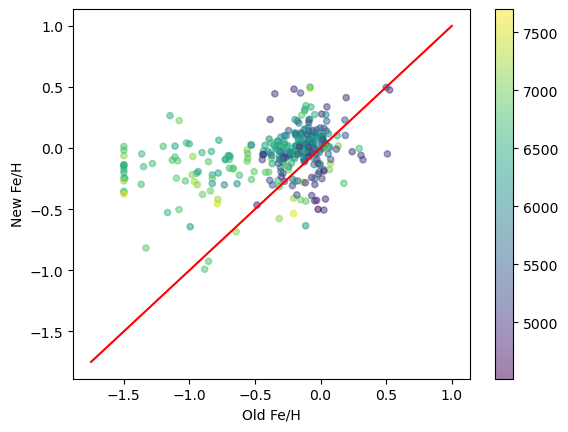

In [97]:
#new vs old Fe/H
fig, ax = plt.subplots()
x1 = np.linspace(-1.75, 1)
ax.plot(x1, x1,'r')
x = NewVsOld['[Fe/H]_old']
y = NewVsOld['[Fe/H]_new']
scatter = plt.scatter(x, y, c = NewVsOld['Teff_new'], alpha = 0.5, s = 20)
#plt.errorbar(x, y, yerr=NewVsOld['[Fe/H]_err_new'], fmt="none", color='gray', zorder= -1)
#plt.errorbar(x, y, xerr=NewVsOld['[Fe/H]_err_old'], fmt="none", color='gray', zorder = -1)
plt.colorbar(scatter)
ax.set_xlabel('Old Fe/H')
ax.set_ylabel('New Fe/H')

Text(0, 0.5, 'New RV')

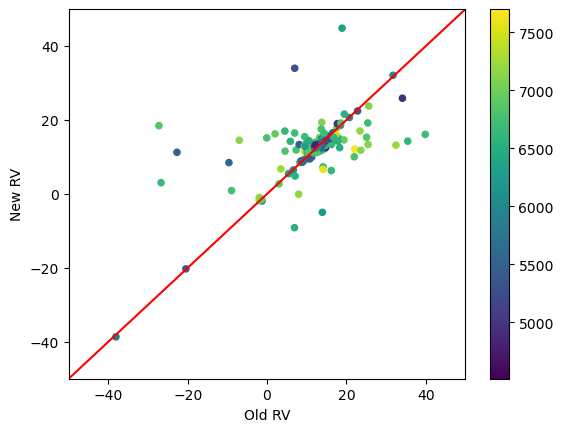

In [100]:
#new vs old RV
fig, ax = plt.subplots()
x1 = np.linspace(-100, 100)
ax.plot(x1, x1,'r')
x = NewVsOld['RV_old']
y = NewVsOld['RV_new']
scatter = plt.scatter(x, y, c = NewVsOld['Teff_new'], s = 20)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
#plt.errorbar(x, y, yerr=NewVsOld['RV_err_new'], fmt="none", color='gray', zorder = -1)
#plt.errorbar(x, y, xerr=NewVsOld['RV_err_old'], fmt="none", color='gray', zorder = -1)
plt.colorbar(scatter)
ax.set_xlabel('Old RV')
ax.set_ylabel('New RV')